# 1 - Look at the Big Picture and Frame the Problem

### Frame the Problem
Hello
### Look at the Big Picture
Hello

### Required Imports
By documentation, we need all the four imports below, especially sklearn, also added seaborn.
> Although `import sklearn` may be refined to `from sklearn... import...` later on.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# 2 - Load the Dataset
Given the datasets url, load in the csv file using pandas.

> We might add options on how to see the dataset.

In [35]:
# Uncomment line below to display all columns of the data, also restart kernel
# pd.set_option('display.max_columns', None)

In [36]:
url = "https://raw.githubusercontent.com/SCI-co-Newb/datasets/main/ds_salaries.csv"
data = pd.read_csv(url)

data_backup = data

### Displaying the data

In [37]:
# Display the full data
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [38]:
# Display the first 5 rows of the data
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [39]:
# Displays the summary of the numerical values in the data
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [44]:
# Displays the summary of the numerical values, and it should exclude teh first column
# data.loc[:, data.columns != ''].describe()

In [45]:
# Displays a quick description of the data, the total number of rows, each attributes type, and the number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


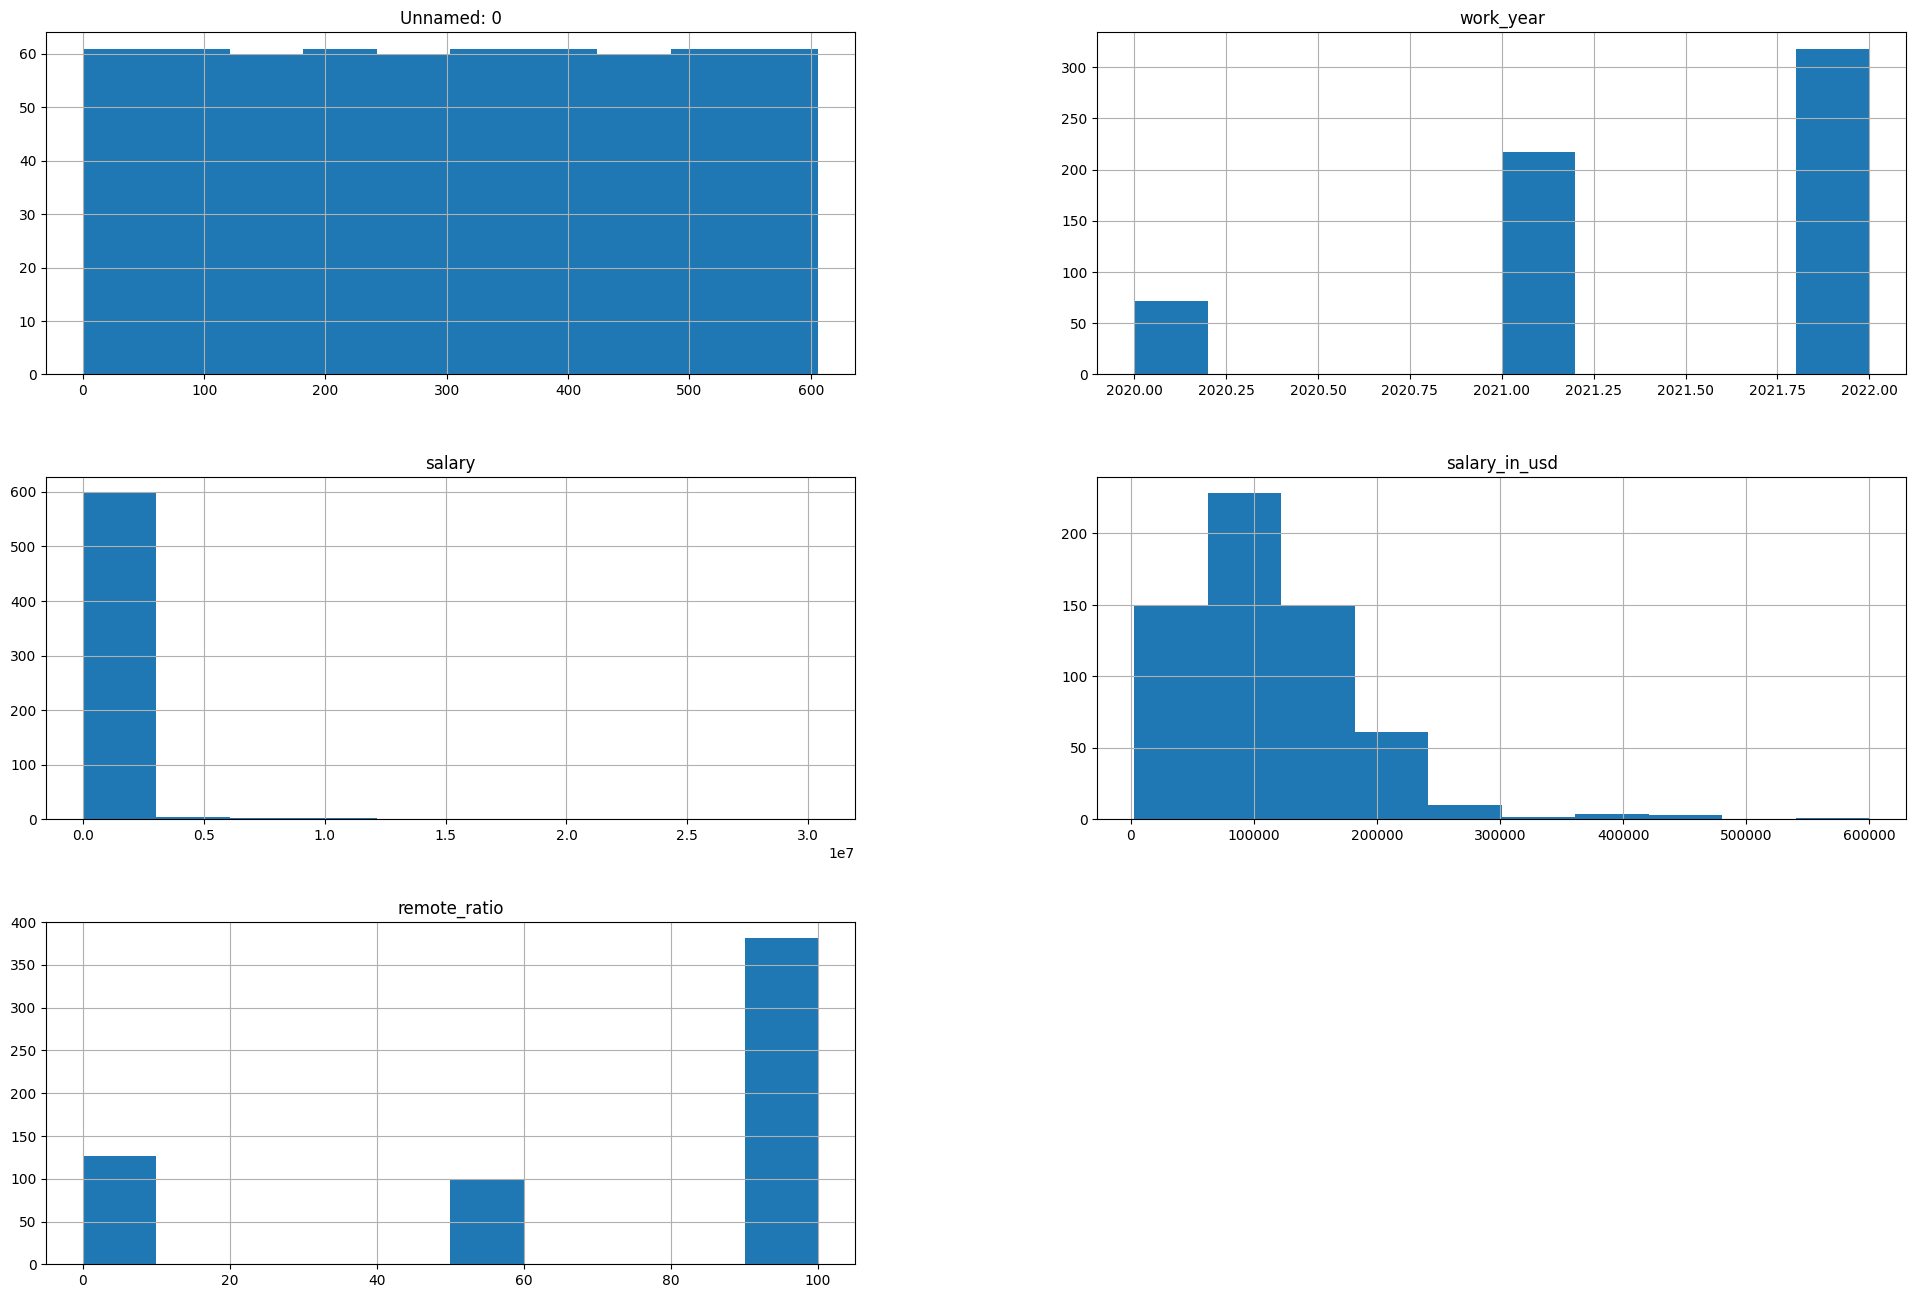

In [49]:
# Display the Histogram
data.hist(figsize=(24, 16))
plt.show()

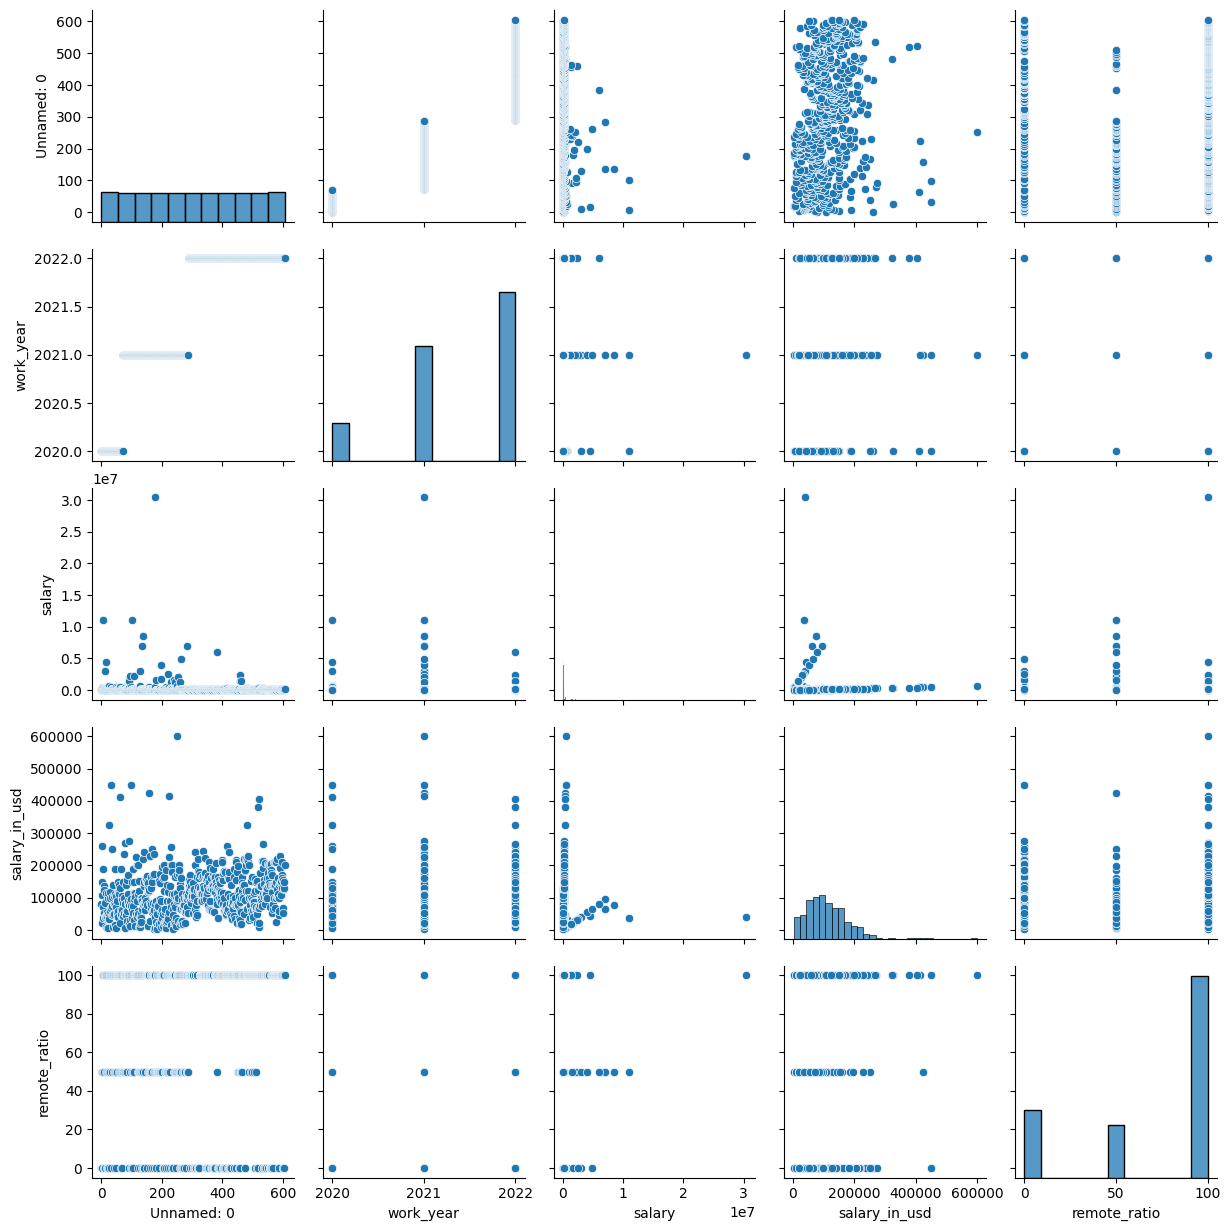

In [53]:
# Check for correlation between attributes using sns.pairplot.
sns.pairplot(data)

In [57]:
#corr method has pearson standard correlation coefficient as the default 
#basically correlation of labels with numeric values
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
Unnamed: 0,1.000000,0.886550,-0.096250,0.167025,0.095000
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000


In [58]:
# Now look at correlation in regards to our target, which is salaray_in_usd
corr_matrix["salary_in_usd"].sort_values(ascending=False)

salary_in_usd    1.000000
work_year        0.170493
Unnamed: 0       0.167025
remote_ratio     0.132122
salary          -0.083906
Name: salary_in_usd, dtype: float64

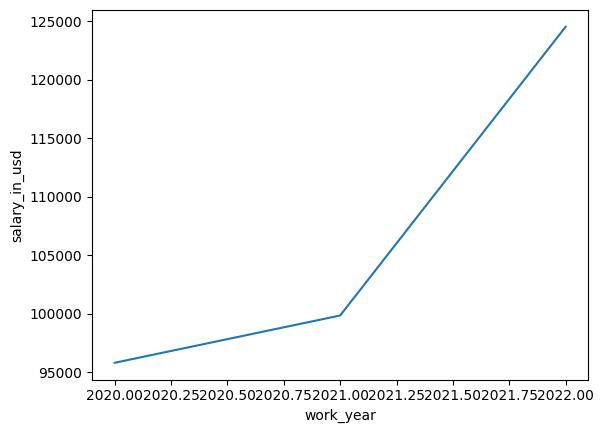

In [61]:
# Lineplot of work_year vs salary_in_usd

work_year_vs_salary_in_usd = sns.lineplot(x="work_year", y="salary_in_usd", data=data, errorbar=None)

Text(0, 0.5, 'salary_in_usd')

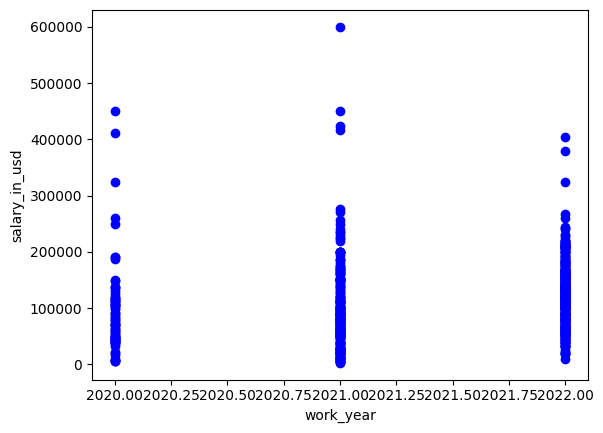

In [62]:
# Scatterplot work_year vs salary_in_usd
X = data["work_year"]
y = data["salary_in_usd"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel("work_year")
plt.ylabel("salary_in_usd")

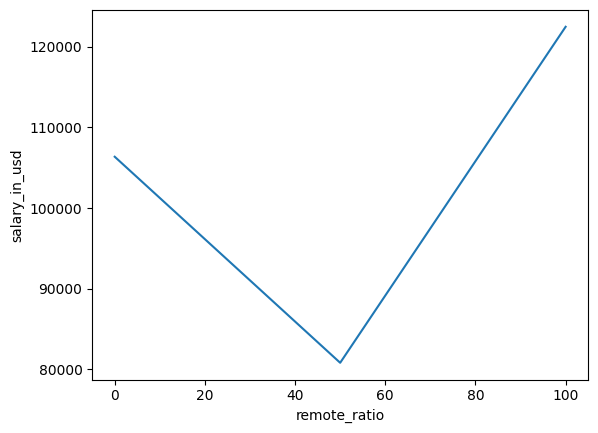

In [63]:
# Lineplot of remote_ratio vs salary_in_usd

remote_ratio_vs_salary_in_usd = sns.lineplot(x="remote_ratio", y="salary_in_usd", data=data, errorbar=None)

Text(0, 0.5, 'salary_in_usd')

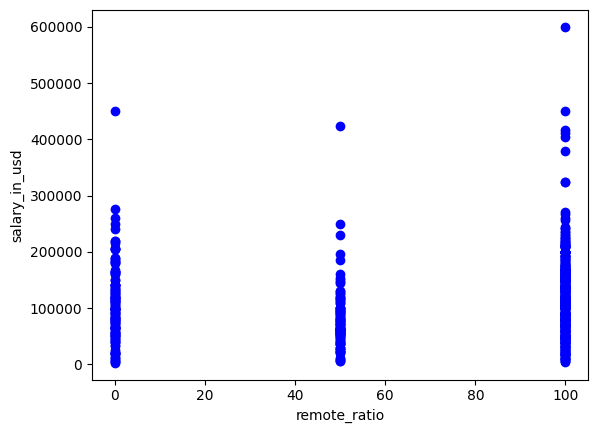

In [64]:
# Scatterplot remote_ratio vs salary_in_usd
X = data["remote_ratio"]
y = data["salary_in_usd"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel("remote_ratio")
plt.ylabel("salary_in_usd")

In [65]:
# There are two rows for salary, we are using salary_in_usd since it's in one curreny
# So dropping salary and salary_currency since salary_in_usd is a much better representation
# Also dropping unnamed since it's just numbering the instances and has nothing to do with salary
# All the other columns are related to salary so we are keeping them
data.drop(labels=['salary', 'salary_currency', 'Unnamed: 0'], axis=1, inplace=True)

In [67]:
# Check to see if the three labels have been dropped
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [68]:
# Checking null
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [69]:
# There are no null characters, and looking into the data there were characters like '?'

In [70]:
# Impor to create a pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [78]:
# Create the cat and num columns
# Get a list of column names from the 'students' DataFrame that are of numerical data types.
# Get a list of column names from the 'students' DataFrame that are not of numerical data types.

num_cols = data.select_dtypes(include='number').columns.to_list()
cat_cols = data.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from numerical columns
num_cols.remove("salary_in_usd")

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

In [79]:
num_cols

['work_year', 'remote_ratio']

In [80]:
cat_cols

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_location',
 'company_size']

In [81]:
# Showing the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['work_year', 'remote_ratio']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['experience_level', 'employment_type',
                                  'job_title', 'employee_residence',
                                  'company_location', 'company_size'])])

In [82]:
# Apply the preprocessing pipeline on the dataset

data_prepared = preprocessing.fit_transform(data)

# Scikit-learn strips the column headers, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
data_prepared = pd.DataFrame(data=data_prepared, columns=feature_names)

data_prepared

,num__work_year,num__remote_ratio,cat__experience_level_EN,cat__experience_level_EX,cat__experience_level_MI,cat__experience_level_SE,cat__employment_type_CT,cat__employment_type_FL,cat__employment_type_FT,cat__employment_type_PT,...,cat__company_location_SG,cat__company_location_SI,cat__company_location_TR,cat__company_location_UA,cat__company_location_US,cat__company_location_VN,cat__company_size_L,cat__company_size_M,cat__company_size_S,remainder__salary_in_usd
0,-2.032024,-1.743615,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,79833.0
1,-2.032024,-1.743615,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,260000.0
2,-2.032024,-0.514377,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,109024.0
3,-2.032024,-1.743615,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20000.0
4,-2.032024,-0.514377,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,0.859977,0.714862,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154000.0
603,0.859977,0.714862,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,126000.0
604,0.859977,-1.743615,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,129000.0
605,0.859977,0.714862,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,150000.0


In [83]:
data_prepared.columns

Index(['num__work_year', 'num__remote_ratio', 'cat__experience_level_EN',
       'cat__experience_level_EX', 'cat__experience_level_MI',
       'cat__experience_level_SE', 'cat__employment_type_CT',
       'cat__employment_type_FL', 'cat__employment_type_FT',
       'cat__employment_type_PT',
       ...
       'cat__company_location_SG', 'cat__company_location_SI',
       'cat__company_location_TR', 'cat__company_location_UA',
       'cat__company_location_US', 'cat__company_location_VN',
       'cat__company_size_L', 'cat__company_size_M', 'cat__company_size_S',
       'remainder__salary_in_usd'],
      dtype='object', length=171)

In [84]:
# Split prepared dataset into 80% trraining and 20% testing
from sklearn.model_selection import train_test_split

X = data_prepared.drop(["remainder__salary_in_usd"], axis=1)
y = data_prepared["remainder__salary_in_usd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(485, 170) (485,) (122, 170) (122,)
